# Data Exploretion and Cleaning

In [1]:
## Import the liberaries that I will be use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
## Get The data and put it in dataframe

rose = pd.read_csv(r'C:\Users\lapstore\Downloads\Compressed\kaggle\Iris.csv')

In [3]:
## look at the data 

rose.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
rose.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
## Get information about the shape of data how many rows and columns.

rose.shape

(150, 6)

In [6]:
## See the types of every column 

rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
## Get the basic statistcs about data

rose.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
## Check if the data has null values.

rose.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Note
#### If I don't Droped the ID column I will not get Any Duplicates because the diffrent will be in ID column.

In [9]:
## Get to know how many data in every species

rose.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
## Delete the ID column 

rose.drop(['Id'], axis = 1, inplace = True)

In [11]:
## Check the data has Duplicated ?
n = []
mm = rose.duplicated()

for i in mm:
    if i == True:
        n.append(1)
    else:
        n.append(0)

In [12]:
n.count(0)

147

In [13]:
## There is duplicated values

n.count(1)

3

In [14]:
## Drop the Duplicated Rows

rose.drop_duplicates(inplace = True)

In [15]:
## Get to know how many data in every species Was Removed

rose.Species.value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

# Visualization with histogram

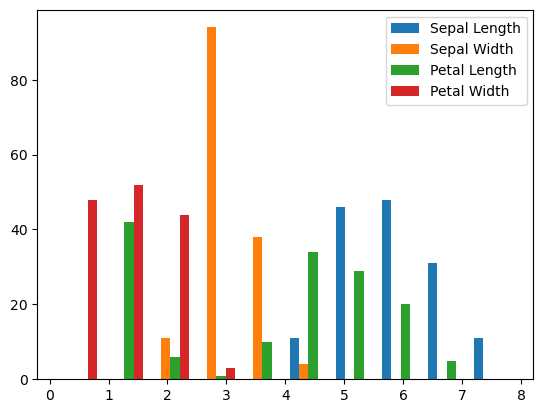

In [16]:
## make histogram to every columns grouped in one  

plt.hist([rose['SepalLengthCm'], rose['SepalWidthCm'], rose['PetalLengthCm'], rose['PetalWidthCm']],
         label = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

plt.legend()

Text(0.5, 1.0, 'Petal Width')

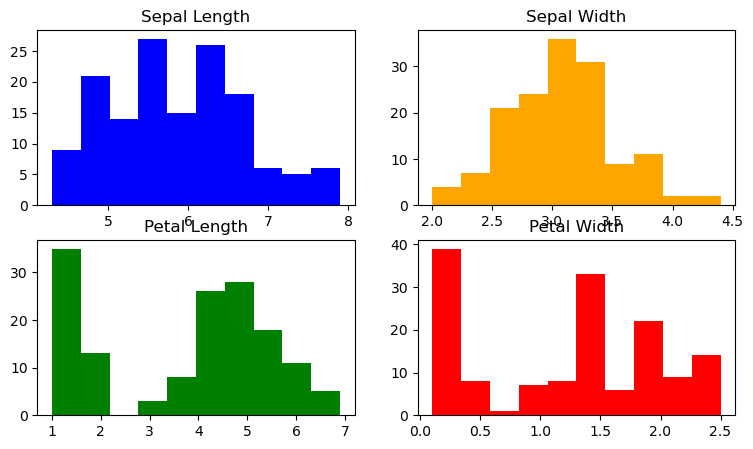

In [17]:
## make histogram to every columns seperated

figs, axs = plt.subplots(2, 2, figsize = (9,5))
axs[0,0].hist(rose['SepalLengthCm'], fc='blue')
axs[0,1].hist(rose['SepalWidthCm'], fc='orange')
axs[1,0].hist(rose['PetalLengthCm'], fc='green')
axs[1,1].hist(rose['PetalWidthCm'], fc='red')
axs[0,0].set_title('Sepal Length')
axs[0,1].set_title('Sepal Width')
axs[1,0].set_title('Petal Length')
axs[1,1].set_title('Petal Width') 

### The petal Lenght and Width looks bianary right (Right Skewed)
### The sepal Lenght and width Versus the Petal are The bell Curve (more Symmetric)
### The Duplicated Rows Was in Iris-virginica and Iris-setosa 
### This Is all what I can Get From Only Histogram Visualization